In [68]:
#import the necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# For time stamps
from datetime import datetime


In [39]:
# Define the ticker symbol
ticker_symbol = 'NVDA'

# Set the start and end dates for the data
start_date = '2014-01-31'
end_date = '2024-01-31'

# Download the data
nvidia_data = yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [38]:
print(nvidia_data.head())
print(nvidia_data.tail())

              Open   High     Low   Close  Adj Close    Volume
Date                                                          
2014-01-02  3.9800  3.995  3.9300  3.9650   3.740547  26009200
2014-01-03  3.9725  3.980  3.9050  3.9175   3.695737  25933200
2014-01-06  3.9575  4.000  3.9200  3.9700   3.745264  40949200
2014-01-07  4.0100  4.050  3.9825  4.0350   3.806585  33328800
2014-01-08  4.0500  4.110  4.0350  4.0900   3.858472  30819200
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-24  603.039978  628.489990  599.380005  613.619995  613.591187   
2024-01-25  623.500000  627.190002  608.500000  616.169983  616.141052   
2024-01-26  609.599976  617.830017  605.729980  610.309998  610.281372   
2024-01-29  612.320007  624.890015  609.070007  624.650024  624.620728   
2024-01-30  629.000000  634.929993  622.599976  627.739990  627.710571   

              Volume  
Date             

In [50]:
#checking for missing values
nvidia_data.isna().sum()
#getting the information on the data types
nvidia_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-01-31 to 2024-01-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [63]:
#exploring the data further to find the mean, std, percentiles, max and min values to understand the volatility of the data.
nvidia_data.describe()

,Open,High,Low,Close,Adj Close,Volume,Close: 30 Day Mean
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2487.000000
mean,105.006601,106.891382,103.073835,105.087403,104.808566,4.599412e+07,102.988938
std,124.425582,126.549727,122.220890,124.530049,124.574278,2.559319e+07,119.383261
min,3.865000,3.880000,3.830000,3.860000,3.641491,4.564400e+06,4.392333
25%,14.110625,14.293125,13.984375,14.130000,13.879923,2.960670e+07,14.801917
50%,53.088751,53.926250,52.243750,53.056250,52.690416,4.048940e+07,53.115417
75%,151.106876,153.549995,148.505623,151.355003,151.197166,5.539605e+07,149.346417
max,629.000000,634.929993,622.599976,627.739990,627.710571,3.692928e+08,537.385999


From the previous code that uses the describe() function to better understand the volatility of the data, we come up with the following findings.
1. The mean values of Open, High, Low, Close are close to each other which indicates relatively stable pricing.
2. The standard deviations of the prices are quite high, which shows considerable variability or volatility in the prices.
3. The median ('50%') values are closer to the 25th percentile ('25%') than the 75th percentile ('75%'), indicating a slight skew towards lower prices.
4. There is considerable standard deviation in the trading volume, which also shows that there is volatility of the price in the shares. High standard deviation in both the prices and the volume indicates that the market for this asset experiences significant fluctuations and volatility.
5. The mean of the 30-day moving average is 102.99 and the standard deviation for the moving average is relatively high, suggesting variability in the trend of the closing prices over the observed period.The moving average varies from a minimum of around 4.39 to a maximum of approximately 537.39.

<Axes: xlabel='Date'>

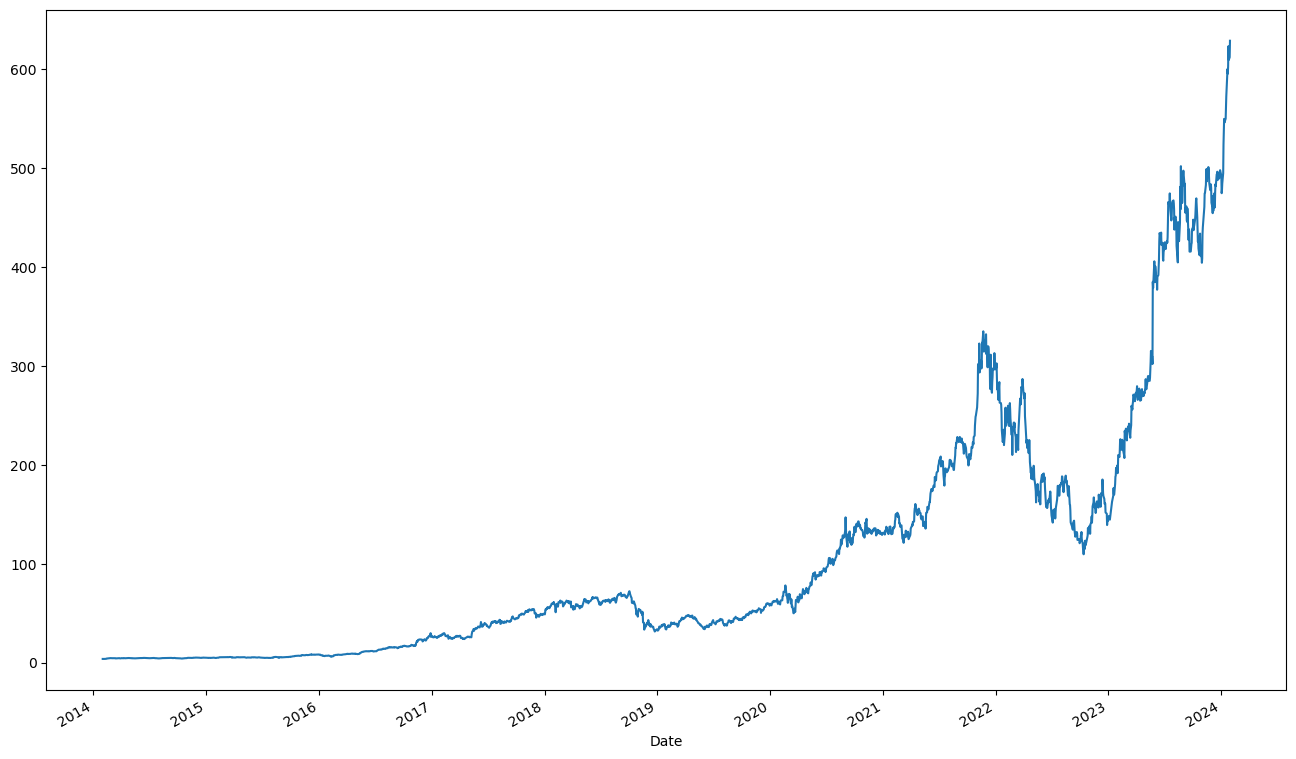

In [46]:
#plotting the close price against the dates to see the movement of the stock over 10 years.
nvidia_data['Open'].plot(figsize = (16, 10))

In [54]:
#getting the 7-day rolling mean, which is the moving average of the past 30 days
nvidia_data.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-03,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-04,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-05,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-06,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-07,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-10,3.901786,3.944643,3.873571,3.915714,3.694051,2.732063e+07
2014-02-11,3.920000,3.962500,3.889286,3.935357,3.712582,2.589257e+07
2014-02-12,3.937500,4.002500,3.920357,3.983214,3.757730,3.036114e+07


<Axes: xlabel='Date'>

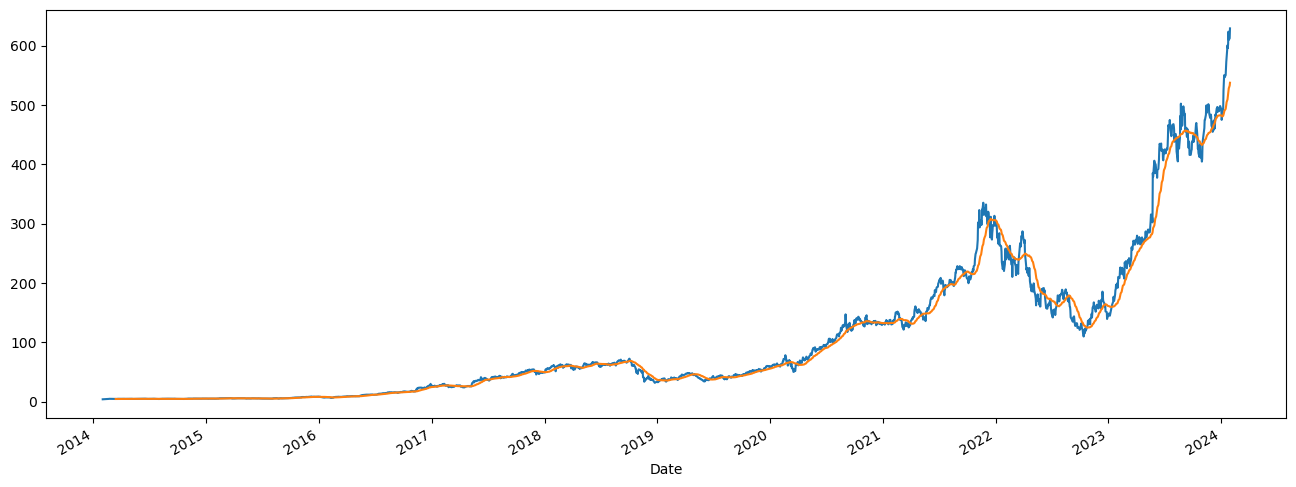

In [56]:
#comparing the plots of the rolling mean and the entire data set plot
nvidia_data['Open'].plot(figsize = (16, 6))
nvidia_data.rolling(window=30).mean()['Close'].plot()

<Axes: xlabel='Date'>

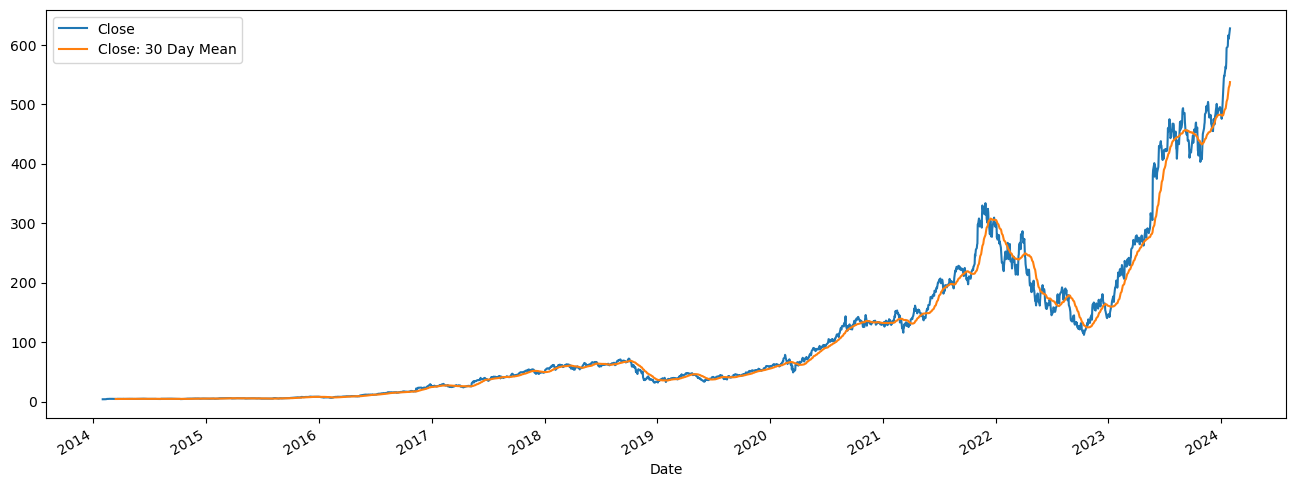

In [61]:
#plotting the close column versus the 30 day moving average
nvidia_data['Close: 30 Day Mean'] = nvidia_data['Close'].rolling(window=30).mean()
nvidia_data[['Close', 'Close: 30 Day Mean']].plot(figsize = (16, 6))

<Axes: xlabel='Date'>

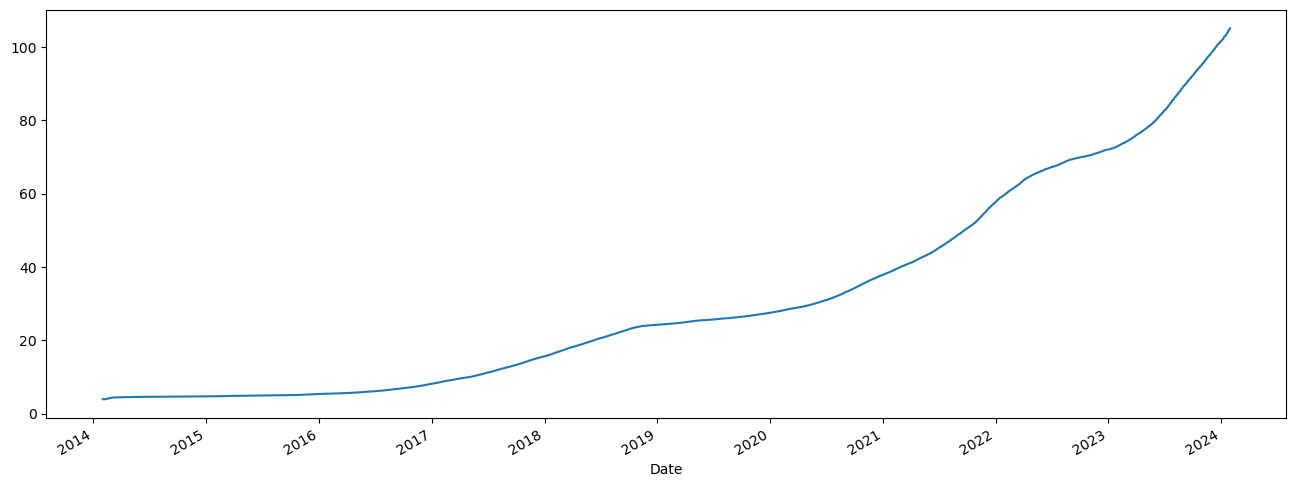

In [62]:
#specifying the number of periods as 1
nvidia_data['Close'].expanding(min_periods = 1).mean().plot(figsize = (16, 6))

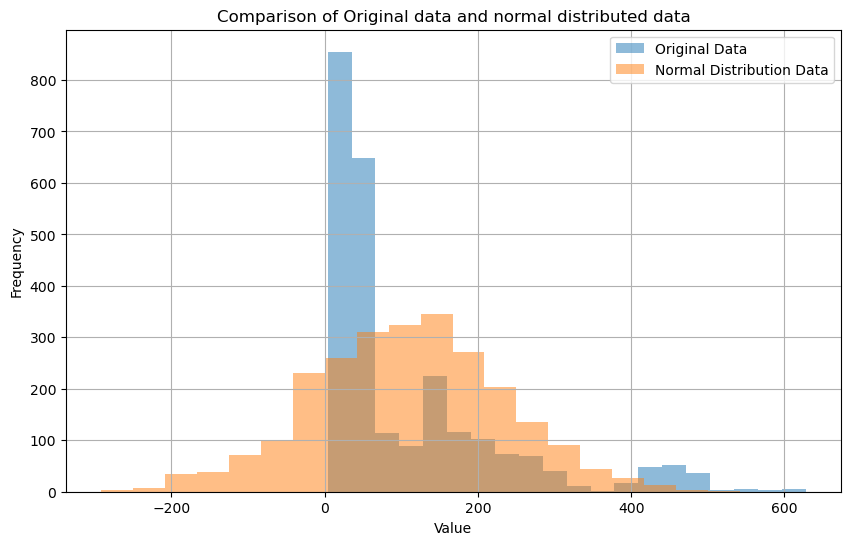

In [65]:
#histograms that give us more information on the distribution of the data by comparing the original data and the normal distribution data
mean = nvidia_data['Close'].mean()
std_dev = nvidia_data['Close'].std()
num_samples = len(nvidia_data)
normal_distribution = np.random.normal(mean, std_dev, num_samples)
plt.figure(figsize=(10, 6))
plt.hist(nvidia_data['Close'], bins = 20, alpha = 0.5, label ='Original Data')
plt.hist(normal_distribution, bins = 20, alpha = 0.5, label = 'Normal Distribution Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comparison of Original data and normal distributed data')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
#To further understand the structure of the data, we print the skewness and the kurtosis of the normal_data
print(skew(normal_distribution))
print(kurtosis(normal_distribution))

0.008344565383299602
0.05344803524455566


In [73]:
#to understand the structure of the distribution, print the skewness and kurtosis of the original nvidia_data
print(skew(nvidia_data['Close']))
print(kurtosis(nvidia_data['Close']))

1.7205768566328026
2.523575823751007


1. From the skewness and kurtosis data, we can see that the data is positively skewed meaning that majority of the data points are concentrated on the left side. In financial terms, this could suggest that there are more instances of small fluctuations in the stock price, with fewer occurrences of large positive movements.
2. When it comes to kurtosis, a value greater than 3 indicates heavy tails compared to a normal distribution. This suggests that the distribution has more extreme values (both positive and negative) than a normal distribution. In financial terms, this could indicate that the stock price experiences more extreme fluctuations than would be expected under a normal distribution.
3. Based on the skewness and kurtosis values provided, it seems that the data is likely following a leptokurtic distribution, which means it has heavier tails and a higher peak compared to a normal distribution. This is often observed in financial data, where extreme events (such as large price movements) are more common than what a normal distribution would predict.







In [75]:
#we perform a normalty test on normal_distribution data
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(normal_distribution)

# Print the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Interpret the result based on the p-value
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")

Shapiro-Wilk Test Statistic: 0.9992145299911499
p-value: 0.3621261417865753
Data looks normally distributed (fail to reject H0)


In [77]:
#we perform the normality test on the original data nvidia stock price

statistic, p_value = shapiro(nvidia_data['Close'])
#print the statistic and the p_value
print("Shapiro-Wilk Test Stastic:", statistic)
print("p_value:", p_value)
#interpret the results according to the p_value
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")


Shapiro-Wilk Test Stastic: 0.7722402811050415
p_value: 0.0
Data does not look normally distributed (reject H0)
